## Machine Learning - 3o Hackaton
# João Gabriel Tavares

# Pacotes:

In [136]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
import time
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve




In [2]:
baseHD = pd.read_excel(r'C:\Users\jgjoa\Documents\heart_disease.xlsx',decimal=',')

baseHD.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [3]:
baseHD.replace('Yes',1, inplace = True)
baseHD.replace('No',0, inplace = True)
baseHD.replace('No, borderline diabetes',1, inplace = True)
baseHD.replace('Yes (during pregnancy)',1, inplace = True)


baseHD['Agemod'] = baseHD['AgeCategory']

baseHD['Agemod'].replace('18-24',1,inplace = True)
baseHD['Agemod'].replace('25-29',2,inplace = True)
baseHD['Agemod'].replace('30-34',3,inplace = True)
baseHD['Agemod'].replace('35-39',4,inplace = True)
baseHD['Agemod'].replace('40-44',5,inplace = True)
baseHD['Agemod'].replace('45-49',6,inplace = True)
baseHD['Agemod'].replace('50-54',7,inplace = True)
baseHD['Agemod'].replace('55-59',8,inplace = True)
baseHD['Agemod'].replace('60-64',9,inplace = True)
baseHD['Agemod'].replace('65-69',10,inplace = True)
baseHD['Agemod'].replace('70-74',11,inplace = True)
baseHD['Agemod'].replace('75-79',12,inplace = True)
baseHD['Agemod'].replace('80 or older',13,inplace = True)


baseHD.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Agemod
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,1,1,Very good,5,1,0,1,8
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,0,1,Very good,7,0,0,0,13
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,1,1,Fair,8,1,0,0,10
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,0,0,Good,6,0,0,1,12
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,0,1,Very good,8,0,0,0,5


In [4]:
X = baseHD.drop(['HeartDisease','Sex','AgeCategory','GenHealth','Race'], axis=1)

y = baseHD['HeartDisease']


In [5]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)



In [6]:
X2D[:5]

array([[ 16.23788786, -21.23432515],
       [ -6.32786815,  -0.4348397 ],
       [ 29.55134527,  -7.5108176 ],
       [ -5.72042076,   0.28843526],
       [ 13.91109039,  17.44463303]])

In [7]:
pca.explained_variance_ratio_


array([0.45141412, 0.25341696])

In [8]:
np.sum(pca.explained_variance_ratio_)

0.7048310786443903

In [9]:
1 - pca.explained_variance_ratio_.sum()


0.2951689213556097

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.85) +1

In [11]:
d

3

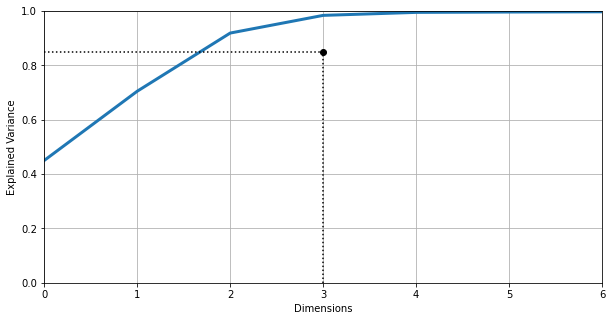

In [12]:
plt.figure(figsize=(10,5))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 6, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.85], "k:")
plt.plot([0, d], [0.85, 0.85], "k:")
plt.plot(d, 0.85, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()


In [13]:
pca2 = PCA(n_components=0.85)
X_reduced = pca2.fit_transform(X_train)


In [14]:
pca2.n_components_


3

In [15]:
np.sum(pca2.explained_variance_ratio_)

0.9188373519740317

In [16]:
pca2.explained_variance_ratio_


array([0.45009305, 0.25467803, 0.21406628])

In [17]:
pca3 = PCA(n_components=3)
X_reduced = pca3.fit_transform(X_train)
X_recovered = pca3.inverse_transform(X_reduced)

In [18]:
pca3.n_components_


3

In [19]:
np.sum(pca3.explained_variance_ratio_)

0.9188373519740305

In [20]:
pca3.explained_variance_ratio_

array([0.45009305, 0.25467803, 0.21406628])

In [21]:
X3D = pca3.fit_transform(X)

# Aplicando o PCA com SGD Classifier

## PCA(3D)

In [22]:
X3D_train, X3D_test, y_train, y_test = train_test_split(X3D, y)

y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

In [23]:
sgd_clf = SGDClassifier(max_iter=1000, tol=0.001, random_state=42)
sgd_clf.fit(X3D_train, y_train)

SGDClassifier(random_state=42)

In [24]:
crossVal3D = cross_val_score(sgd_clf, X3D_train, y_train, cv=3, scoring="accuracy")

crossVal3D

array([0.91447047, 0.91447047, 0.91448191])

In [25]:
score = sgd_clf.score(X3D_train, y_train_1)
print("Training score: ", round(score,2)) 


Training score:  0.88


In [26]:
y_train_pred = cross_val_predict(sgd_clf, X3D_train, y_train_1, cv=3)

confusion_matrix(y_train_1, y_train_pred)

array([[219333,      0],
       [ 20513,      0]], dtype=int64)

## PCA(2D)

In [27]:
X2D_train, X2D_test, y_train, y_test = train_test_split(X2D, y)


In [28]:
sgd_clf2 = SGDClassifier(max_iter=1000, tol=0.001, random_state=42)
sgd_clf2.fit(X2D_train, y_train)

SGDClassifier(random_state=42)

In [29]:
crossVal2D = cross_val_score(sgd_clf2, X2D_train, y_train, cv=3, scoring="accuracy")

crossVal2D

array([0.91470813, 0.91470813, 0.90576375])

In [30]:
score = sgd_clf2.score(X2D_train, y_train_1)
print("Training score: ", round(score,2)) 


Training score:  0.91


In [31]:
y_train_pred = cross_val_predict(sgd_clf2, X2D_train, y_train_1, cv=3)

confusion_matrix(y_train_1, y_train_pred)

array([[219333,      0],
       [ 20513,      0]], dtype=int64)

## Aplicando PCA com Random Forest

In [32]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X3D_train, y_train_1, cv=3,
                                    method="predict_proba")

In [33]:
crossValforest = cross_val_score(forest_clf, X3D_train, y_train_1, cv=3, scoring="accuracy")

crossValforest


array([0.90461419, 0.90592753, 0.90502577])

In [38]:
y_train_pred = cross_val_predict(forest_clf, X2D_train, y_train_1, cv=3)

confusion_matrix(y_train_1, y_train_pred)

array([[216577,   2756],
       [ 20206,    307]], dtype=int64)

# PROJETO 2

In [172]:
#basebcb = pd.read_csv(r'C:\Users\jgjoa\Documents\dados2.CSV',delimiter=';',decimal=',')

basebcb = pd.read_excel(r'C:\Users\jgjoa\Documents\dados.xlsx',decimal=',')

basebcb.head()

,Instituição financeira,Código,TCB,TD,TC,SR,Segmento,Cidade,UF,Data,...,Unnamed: 65,Unnamed: 66,Total Exterior Pessoa Física,EmpComFolha_perc,EmpSemFolha_perc,Veiculos_perc,Habitacao_perc,Cartao_perc,RuralAgro_perc,Outros_perc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,A vencer Acima de 5400 Dias,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAIXA ECONÔMICA FEDERAL,51626.0,b1,C,1.0,S1,199.0,BRASILIA,DF,2022-06-01,...,13773,12038700,0,0.006829,0.013244,0.028510,0.002088,0.127422,0.006062,0.093555
2,BB,49906.0,b1,C,1.0,S1,199.0,BRASILIA,DF,2022-06-01,...,136238,11797514,3953116,0.002724,0.022412,0.008572,0.001124,0.094106,0.004523,0.057983
3,ITAU,10069.0,b1,C,2.0,S1,199.0,SAO PAULO,SP,2022-06-01,...,1641,29748830,83103136,0.007637,0.031341,0.016861,0.000593,0.081941,0.000569,0.088207
4,BRADESCO,10045.0,b1,C,2.0,S1,199.0,OSASCO,SP,2022-06-01,...,670,21548332,4701644,0.004964,0.039689,0.012786,0.000939,0.106399,0.005501,0.086420


In [173]:
basebcb.columns

Index(['Instituição financeira', 'Código', 'TCB', 'TD', 'TC', 'SR', 'Segmento',
       'Cidade', 'UF', 'Data', 'Total da Carteira de Pessoa Física',
       'Empréstimo com Consignação em Folha', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Empréstimo sem Consignação em Folha', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Veículos', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Habitação', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Cartão de Crédito', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Rural e Agroindustrial', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'U

In [174]:
basebcb = basebcb.rename(columns={
'Empréstimo com Consignação em Folha': 'EmpComFolha_v15', 
'Unnamed: 12': 'EmpComFolha_v90',
'Unnamed: 13': 'EmpComFolha_v91a360',
'Unnamed: 14': 'EmpComFolha_v361a1080',
'Unnamed: 15': 'EmpComFolha_v1081a1800',
'Unnamed: 16': 'EmpComFolha_v1081a5400',
'Unnamed: 17': 'EmpComFolha_v1081',
'Unnamed: 18': 'EmpComFolha_Total',
'Empréstimo sem Consignação em Folha': 'EmpSemFolha_v15',    
'Unnamed: 20': 'EmpSemFolha_v90',
'Unnamed: 21': 'EmpSemFolha_v91a360',
'Unnamed: 22': 'EmpSemFolha_v361a1080',
'Unnamed: 23': 'EmpSemFolha_v1081a1800',
'Unnamed: 24': 'EmpSemFolha_v1081a5400',
'Unnamed: 25': 'EmpSemFolha_v1081',
'Unnamed: 26': 'EmpSemFolha_Total', 
'Veículos': 'Veiculos_v15',    
'Unnamed: 28': 'Veiculos_v90',
'Unnamed: 29': 'Veiculos_v91a360',
'Unnamed: 30': 'Veiculos_v361a1080',
'Unnamed: 31': 'Veiculos_v1081a1800',
'Unnamed: 32': 'Veiculos_v1081a5400',
'Unnamed: 33': 'Veiculos_v1081',
'Unnamed: 34': 'Veiculos_Total',
'Habitação': 'Habitacao_v15',    
'Unnamed: 36': 'Habitacao_v90',
'Unnamed: 37': 'Habitacao_v91a360',
'Unnamed: 38': 'Habitacao_v361a1080',
'Unnamed: 39': 'Habitacao_v1081a1800',
'Unnamed: 40': 'Habitacao_v1081a5400',
'Unnamed: 41': 'Habitacao_v1081',
'Unnamed: 42': 'Habitacao_Total',
'Cartão de Crédito': 'Cartao_v15',    
'Unnamed: 44': 'Cartao_v90',
'Unnamed: 45': 'Cartao_v91a360',
'Unnamed: 46': 'Cartao_v361a1080',
'Unnamed: 47': 'Cartao_v1081a1800',
'Unnamed: 48': 'Cartao_v1081a5400',
'Unnamed: 49': 'Cartao_v1081',
'Unnamed: 50': 'Cartao_Total',
'Rural e Agroindustrial': 'RuralAgro_v15',    
'Unnamed: 52': 'RuralAgro_v90',
'Unnamed: 53': 'RuralAgro_v91a360',
'Unnamed: 54': 'RuralAgro_v361a1080',
'Unnamed: 55': 'RuralAgro_v1081a1800',
'Unnamed: 56': 'RuralAgro_v1081a5400',
'Unnamed: 57': 'RuralAgro_v1081',
'Unnamed: 58': 'RuralAgro_Total',
'Outros Créditos': 'Outros_v15',    
'Unnamed: 60': 'Outros_v90',
'Unnamed: 61': 'Outros_v91a360',
'Unnamed: 62': 'Outros_v361a1080',
'Unnamed: 63': 'Outros_v1081a1800',
'Unnamed: 64': 'Outros_v1081a5400',
'Unnamed: 65': 'Outros_v1081',
'Unnamed: 66': 'Outros_Total',
})


In [175]:
basebcb['Outros_Total']

0           Total
1        12038700
2        11797514
3        29748830
4        21548332
          ...    
1363          NaN
1364    119781084
1365       0.7241
1366     45629366
1367       0.2759
Name: Outros_Total, Length: 1368, dtype: object

In [176]:
basebcb.drop(labels=0, axis=0,inplace=True)

In [177]:
basebcb.drop(labels=range(1339, 1368), axis=0,inplace=True)

In [178]:
basebcb.tail()

,Instituição financeira,Código,TCB,TD,TC,SR,Segmento,Cidade,UF,Data,...,Outros_v1081,Outros_Total,Total Exterior Pessoa Física,EmpComFolha_perc,EmpSemFolha_perc,Veiculos_perc,Habitacao_perc,Cartao_perc,RuralAgro_perc,Outros_perc
1334,FLAGSHIP INSTITUICAO DE PAGAMENTOS LTDA,23114447.0,n4,I,2.0,NaN,41.0,SAO PAULO,SP,2022-06-01,...,NI,NI,NI,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,HINOVA PAY INSTITUICAO DE PAGAMENTO S.A.,27970567.0,n4,I,2.0,NaN,41.0,BELO HORIZONTE,MG,2022-06-01,...,NI,NI,NI,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1336,BANQI INSTITUICAO DE PAGAMENTO LTDA.,30723871.0,n4,I,2.0,S5,41.0,SAO PAULO,SP,2022-06-01,...,NI,NI,NI,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1337,SHPP BRASIL INSTITUIÇÃO DE PAGAMENTO E SERVIÇO...,38372267.0,n4,I,2.0,NaN,41.0,SAO PAULO,SP,2022-06-01,...,NI,NI,NI,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1338,CRYSTAL BMC - INSTITUICAO DE PAGAMENTO LTDA.,43561343.0,n4,I,2.0,NaN,41.0,BARUERI,SP,2022-06-01,...,NI,NI,NI,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
basebcb.columns

Index(['Instituição financeira', 'Código', 'TCB', 'TD', 'TC', 'SR', 'Segmento',
       'Cidade', 'UF', 'Data', 'Total da Carteira de Pessoa Física',
       'EmpComFolha_v15', 'EmpComFolha_v90', 'EmpComFolha_v91a360',
       'EmpComFolha_v361a1080', 'EmpComFolha_v1081a1800',
       'EmpComFolha_v1081a5400', 'EmpComFolha_v1081', 'EmpComFolha_Total',
       'EmpSemFolha_v15', 'EmpSemFolha_v90', 'EmpSemFolha_v91a360',
       'EmpSemFolha_v361a1080', 'EmpSemFolha_v1081a1800',
       'EmpSemFolha_v1081a5400', 'EmpSemFolha_v1081', 'EmpSemFolha_Total',
       'Veiculos_v15', 'Veiculos_v90', 'Veiculos_v91a360',
       'Veiculos_v361a1080', 'Veiculos_v1081a1800', 'Veiculos_v1081a5400',
       'Veiculos_v1081', 'Veiculos_Total', 'Habitacao_v15', 'Habitacao_v90',
       'Habitacao_v91a360', 'Habitacao_v361a1080', 'Habitacao_v1081a1800',
       'Habitacao_v1081a5400', 'Habitacao_v1081', 'Habitacao_Total',
       'Cartao_v15', 'Cartao_v90', 'Cartao_v91a360', 'Cartao_v361a1080',
       'Cartao_v1081a

In [180]:
basebcb.head()

,Instituição financeira,Código,TCB,TD,TC,SR,Segmento,Cidade,UF,Data,...,Outros_v1081,Outros_Total,Total Exterior Pessoa Física,EmpComFolha_perc,EmpSemFolha_perc,Veiculos_perc,Habitacao_perc,Cartao_perc,RuralAgro_perc,Outros_perc
1,CAIXA ECONÔMICA FEDERAL,51626.0,b1,C,1.0,S1,199.0,BRASILIA,DF,2022-06-01,...,13773,12038700,0,0.006829,0.013244,0.028510,0.002088,0.127422,0.006062,0.093555
2,BB,49906.0,b1,C,1.0,S1,199.0,BRASILIA,DF,2022-06-01,...,136238,11797514,3953116,0.002724,0.022412,0.008572,0.001124,0.094106,0.004523,0.057983
3,ITAU,10069.0,b1,C,2.0,S1,199.0,SAO PAULO,SP,2022-06-01,...,1641,29748830,83103136,0.007637,0.031341,0.016861,0.000593,0.081941,0.000569,0.088207
4,BRADESCO,10045.0,b1,C,2.0,S1,199.0,OSASCO,SP,2022-06-01,...,670,21548332,4701644,0.004964,0.039689,0.012786,0.000939,0.106399,0.005501,0.086420
5,SANTANDER,30379.0,b1,C,3.0,S1,199.0,SAO PAULO,SP,2022-06-01,...,151958,32140829,3515239,0.019424,0.079816,0.016462,0.001393,0.061081,0.003144,0.083495


In [181]:
basebcb = basebcb[basebcb.EmpComFolha_v15!="NI"]
basebcb = basebcb.dropna()

In [189]:
basebcb.tail()

,Instituição financeira,Código,TCB,TD,TC,SR,Segmento,Cidade,UF,Data,...,Outros_v1081,Outros_Total,Total Exterior Pessoa Física,EmpComFolha_perc,EmpSemFolha_perc,Veiculos_perc,Habitacao_perc,Cartao_perc,RuralAgro_perc,Outros_perc
1307,COOPERATIVA CENTRAL DE ECONOMIA E CRÉDITO MÚTU...,86774775.0,b3C,I,2.0,S4,9.0,RIO DE JANEIRO,RJ,2022-06-01,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308,CPCI - COMPANHIA DE CRÉDITO IMOBILIÁRIO S/A,87091716.0,n1,I,2.0,S5,31.0,PORTO ALEGRE,RS,2022-06-01,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1313,"FINANSINOS S.A. CREDITO, FINANCIAMENTO E INVES...",91669747.0,n1,I,2.0,S5,14.0,NOVO HAMBURGO,RS,2022-06-01,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1318,"SOLIDEZ - CORRETORA DE CÂMBIO, TÍTULOS E VALOR...",96477906.0,n2,I,2.0,S4,15.0,SAO PAULO,SP,2022-06-01,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1319,HP FINANCIAL SERVICES ARRENDAMENTO MERCANTIL S.A.,97406706.0,n1,I,3.0,S4,19.0,BARUERI,SP,2022-06-01,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
#basebcb.sort_values(['Instituição financeira','Total da Carteira de Pessoa Física'],ascending=False).groupby('Instituição financeira').sum()


basebcb.groupby(['Instituição financeira','Total da Carteira de Pessoa Física','EmpComFolha_Total']).sum().sort_values('Total da Carteira de Pessoa Física',ascending=False)



,,,Código,TC,Segmento,EmpComFolha_perc,EmpSemFolha_perc,Veiculos_perc,Habitacao_perc,Cartao_perc,RuralAgro_perc,Outros_perc
Instituição financeira,Total da Carteira de Pessoa Física,EmpComFolha_Total,,,,,,,,,,
CAIXA ECONÔMICA FEDERAL,723569731,90206639,51626.0,1.0,199.0,0.006829,0.013244,0.028510,0.002088,0.127422,0.006062,0.093555
BB,499579279,110683072,49906.0,1.0,199.0,0.002724,0.022412,0.008572,0.001124,0.094106,0.004523,0.057983
ITAU,460756358,70557258,10069.0,2.0,199.0,0.007637,0.031341,0.016861,0.000593,0.081941,0.000569,0.088207
BRADESCO,337705889,86078132,10045.0,2.0,199.0,0.004964,0.039689,0.012786,0.000939,0.106399,0.005501,0.086420
SANTANDER,272575252,54449495,30379.0,3.0,199.0,0.019424,0.079816,0.016462,0.001393,0.061081,0.003144,0.083495
...,...,...,...,...,...,...,...,...,...,...,...,...
COOPERATIVA CENTRAL DE CRÉDITO DE GOIÁS LTDA,0,0,33416108.0,2.0,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
COOPERATIVA CENTRAL DE CRÉDITO DA BAHIA LTDA - SICOOB CENTRAL BA,0,0,34148882.0,2.0,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ATICCA - SOCIEDADE DE CRÉDITO DIRETO S.A.,0,0,44478623.0,2.0,43.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

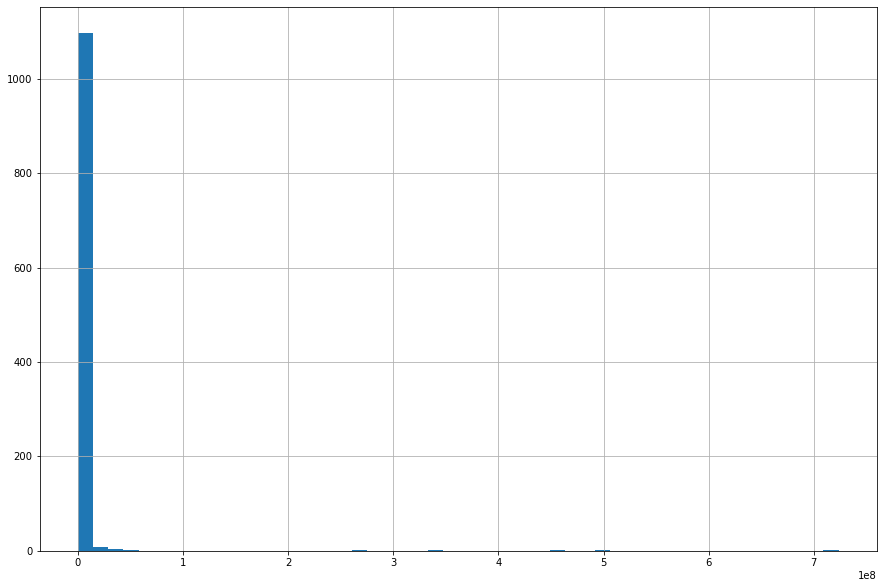

In [183]:
basebcb['Total da Carteira de Pessoa Física'].hist(figsize=(15,10),bins=50)

<AxesSubplot:>

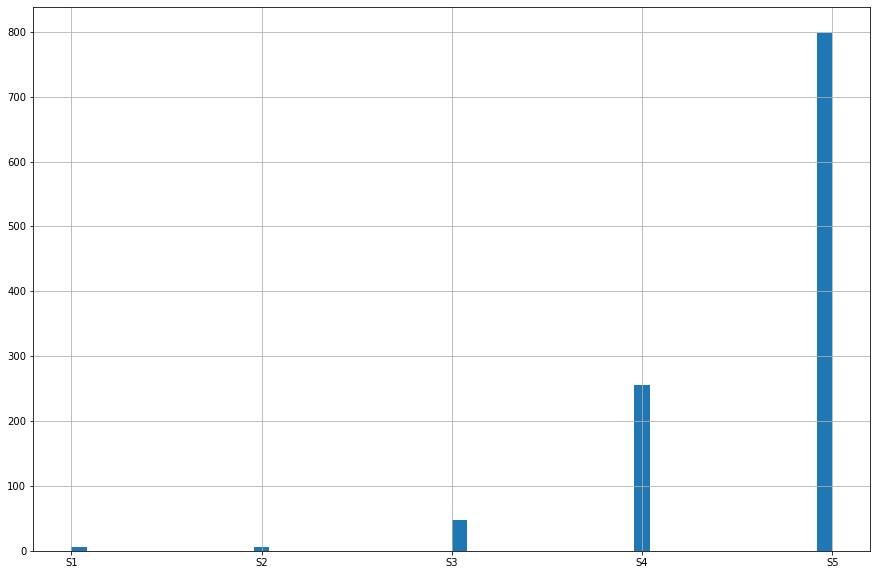

In [184]:
basebcb['SR'].hist(figsize=(15,10),bins=50)

In [53]:
basebcb['EmpComFolha_Total'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 1        90206639
2       110683072
3        70557258
4        86078132
5        54449495
          ...    
1307            0
1308            0
1313            0
1318            0
1319            0
Name: EmpComFolha_Total, Length: 1114, dtype: object>

# Cluesterização a partir dos totais por produto

In [353]:
basebcb= basebcb[basebcb['Total da Carteira de Pessoa Física']>0]


In [354]:
X = basebcb[['EmpComFolha_Total','EmpSemFolha_Total','Veiculos_Total','Habitacao_Total','Cartao_Total','RuralAgro_Total','Outros_Total']]
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [355]:
X = X.reset_index()

In [356]:
model = AgglomerativeClustering(affinity = "euclidean", linkage = "ward", n_clusters = 5)
clusters = model.fit_predict(X)

In [357]:
Clust = pd.DataFrame(clusters)
X['cluster'] = Clust
X['cluster'].value_counts()

0    1042
2       2
3       1
4       1
1       1
Name: cluster, dtype: int64

In [358]:
y_pred

array([1, 2, 4, ..., 0, 0, 0])

In [359]:
y_pred is kmeans.labels_


True

In [360]:
Centers0 = kmeans.cluster_centers_
Centers0

array([[1.32500862e+05, 1.19986611e+05, 1.16186336e+05, 2.22546555e+04,
        1.38474562e+05, 1.14970205e+05, 5.54417284e+04],
       [9.02066390e+07, 1.39461560e+07, 9.24600000e+04, 5.76343778e+08,
        1.13771100e+07, 1.95648890e+07, 1.20387000e+07],
       [1.10683072e+08, 4.12652980e+07, 4.17382900e+06, 4.60543300e+07,
        5.20310660e+07, 2.29621052e+08, 1.17975140e+07],
       [7.02638135e+07, 2.58458035e+07, 4.61337055e+07, 6.56983200e+07,
        5.36715905e+07, 1.25743160e+07, 2.68445805e+07],
       [7.05572580e+07, 2.09077260e+07, 3.19578970e+07, 9.51012390e+07,
        1.26350025e+08, 3.03024700e+06, 2.97488300e+07]])

In [361]:
kmeans.labels_


array([1, 2, 4, ..., 0, 0, 0])

In [362]:
# Clusterização por emprestimo com folha

In [363]:
X = basebcb[['EmpComFolha_Total','Total da Carteira de Pessoa Física']]

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [364]:
model = AgglomerativeClustering(affinity = "euclidean", linkage = "ward", n_clusters = 6)
clusters = model.fit_predict(X)

In [365]:
Clust = pd.DataFrame(clusters)
X['cluster'] = Clust
X['cluster'].value_counts()

2.0    995
3.0     37
4.0      5
1.0      2
0.0      2
Name: cluster, dtype: int64

In [366]:
#X[0:2, 1]

In [367]:
y_pred

array([1, 3, 3, ..., 0, 0, 0])

In [368]:
y_pred is kmeans.labels_


True

In [369]:
Centers = kmeans.cluster_centers_
Centers

array([[6.07942654e+04, 3.53662884e+05],
       [9.02066390e+07, 7.23569731e+08],
       [7.02638135e+07, 3.05140570e+08],
       [9.06201650e+07, 4.80167818e+08],
       [4.45598682e+06, 2.16948929e+07]])

In [370]:
Centers[:,0]

array([6.07942654e+04, 9.02066390e+07, 7.02638135e+07, 9.06201650e+07,
       4.45598682e+06])

In [371]:
kmeans.labels_


array([1, 3, 3, ..., 0, 0, 0])

In [372]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [373]:
#plt.figure(figsize=(8, 4))
#plot_clusters(X)
#plt.show()

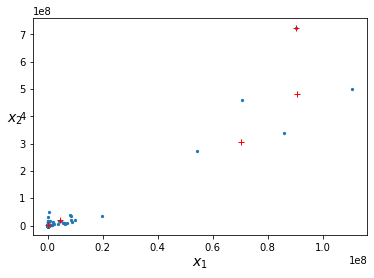

<Figure size 72x72 with 0 Axes>

In [374]:
    plt.scatter(basebcb['EmpComFolha_Total'],basebcb['Total da Carteira de Pessoa Física'],s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.plot(Centers[:,0],Centers[:,1], 'r+')
    plt.figure(figsize=(1, 1))
    plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [30.0, 30.0, 70.0, 70.0],
  [5.0, 5.0, 50.0, 50.0]],
 'dcoord': [[0.0, 6748328.809347764, 6748328.809347764, 0.0],
  [0.0, 9493796.177810065, 9493796.177810065, 0.0],
  [6748328.809347764, 9648692.94787071, 9648692.94787071, 9493796.177810065],
  [0.0, 43836627.75245634, 43836627.75245634, 0.0],
  [0.0, 67766812.13161334, 67766812.13161334, 0.0],
  [43836627.75245634, 123878229.4235518, 123878229.4235518, 67766812.13161334],
  [9648692.94787071,
   225007153.36579084,
   225007153.36579084,
   123878229.4235518],
  [0.0, 225650300.48014665, 225650300.48014665, 225007153.36579084]],
 'ivl': ['0', '(2)', '(1035)', '5', '(4)', '1', '2', '3', '4'],
 'leaves': [0, 2081, 2082, 5, 2084, 1, 2, 3, 4],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1', 'C1', 

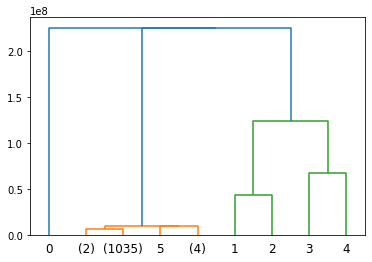

In [402]:
dendrogram(linkage(X), truncate_mode = 'level', p = 3)


In [378]:
# Clusterização por emprestimo sem folha

In [379]:
X = basebcb[['EmpSemFolha_Total','Total da Carteira de Pessoa Física']]

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [409]:
model = AgglomerativeClustering(affinity = "euclidean", linkage = "ward", n_clusters = 5)
clusters = model.fit_predict(X)

In [410]:
Clust = pd.DataFrame(clusters)
X['cluster'] = Clust
X['cluster'].value_counts()

4.0    1032
0.0      35
3.0       2
1.0       2
Name: cluster, dtype: int64

In [119]:
y_pred

array([2, 1, 1, ..., 0, 0, 0])

In [120]:
y_pred is kmeans.labels_


True

In [121]:
Centers2 = kmeans.cluster_centers_
Centers2

array([[6.40240568e+04, 3.22032242e+05],
       [3.10865120e+07, 4.80167818e+08],
       [1.39461560e+07, 7.23569731e+08],
       [2.58458035e+07, 3.05140570e+08],
       [3.06532239e+06, 2.11100255e+07]])

In [122]:
kmeans.labels_


array([2, 1, 1, ..., 0, 0, 0])

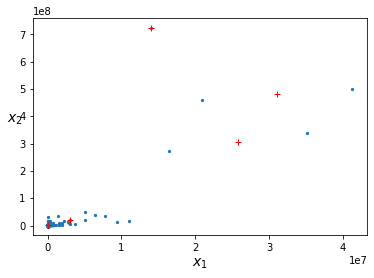

<Figure size 72x72 with 0 Axes>

In [123]:
    plt.scatter(basebcb['EmpSemFolha_Total'],basebcb['Total da Carteira de Pessoa Física'],s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.plot(Centers2[:,0],Centers2[:,1], 'r+')
    plt.figure(figsize=(1, 1))
    plt.show()

In [124]:
# Clusterização por Veiculos_Total

In [125]:
X = basebcb[['Veiculos_Total','Total da Carteira de Pessoa Física']]

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [126]:
y_pred

array([1, 3, 3, ..., 0, 0, 0])

In [127]:
y_pred is kmeans.labels_


True

In [128]:
Centers3 = kmeans.cluster_centers_
Centers3

array([[4.39725357e+04, 3.31963788e+05],
       [9.24600000e+04, 7.23569731e+08],
       [4.61337055e+07, 3.05140570e+08],
       [1.80658630e+07, 4.80167818e+08],
       [4.29695018e+06, 2.16948929e+07]])

In [129]:
kmeans.labels_

array([1, 3, 3, ..., 0, 0, 0])

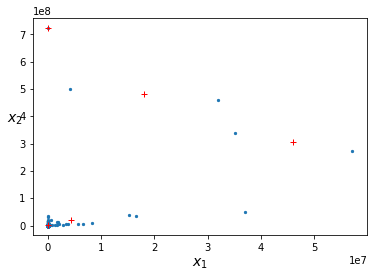

<Figure size 72x72 with 0 Axes>

In [130]:
    plt.scatter(basebcb['Veiculos_Total'],basebcb['Total da Carteira de Pessoa Física'],s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.plot(Centers3[:,0],Centers3[:,1], 'r+')
    plt.figure(figsize=(1, 1))
    plt.show()

In [131]:
X = basebcb[['Habitacao_Total','Total da Carteira de Pessoa Física']]

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [132]:
y_pred

array([2, 1, 1, ..., 0, 0, 0])

In [133]:
y_pred is kmeans.labels_


True

In [134]:
Centers4 = kmeans.cluster_centers_
Centers4

array([[6.47544546e+03, 3.22032242e+05],
       [7.05777845e+07, 4.80167818e+08],
       [5.76343778e+08, 7.23569731e+08],
       [6.56983200e+07, 3.05140570e+08],
       [8.95813333e+05, 2.11100255e+07]])

In [135]:
kmeans.labels_

array([2, 1, 1, ..., 0, 0, 0])

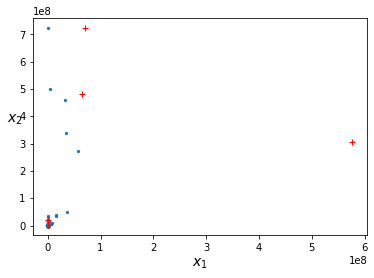

<Figure size 72x72 with 0 Axes>

In [136]:
    plt.scatter(basebcb['Veiculos_Total'],basebcb['Total da Carteira de Pessoa Física'],s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.plot(Centers4[:,0],Centers3[:,1], 'r+')
    plt.figure(figsize=(1, 1))
    plt.show()

In [137]:
X = basebcb[['Total da Carteira de Pessoa Física','Cartao_Total']]

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [138]:
y_pred

array([3, 1, 1, ..., 0, 0, 0])

In [139]:
y_pred is kmeans.labels_


True

In [140]:
Centers5 = kmeans.cluster_centers_
Centers5

array([[3.22032242e+05, 3.23092511e+04],
       [4.80167818e+08, 8.91905455e+07],
       [3.05140570e+08, 5.36715905e+07],
       [7.23569731e+08, 1.13771100e+07],
       [2.11100255e+07, 6.05783894e+06]])

In [141]:
kmeans.labels_

array([3, 1, 1, ..., 0, 0, 0])

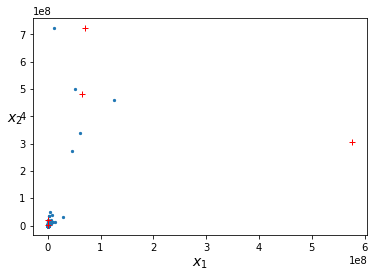

<Figure size 72x72 with 0 Axes>

In [142]:
    plt.scatter(basebcb['Cartao_Total'],basebcb['Total da Carteira de Pessoa Física'],s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.plot(Centers4[:,0],Centers3[:,1], 'r+')
    plt.figure(figsize=(1, 1))
    plt.show()

In [143]:
X = basebcb[['Total da Carteira de Pessoa Física','RuralAgro_Total']]

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [144]:
y_pred

array([2, 3, 1, ..., 0, 0, 0])

In [145]:
y_pred is kmeans.labels_


True

In [146]:
Centers6 = kmeans.cluster_centers_
Centers6

array([[6.59438805e+05, 1.08024305e+05],
       [4.60756358e+08, 3.03024700e+06],
       [7.23569731e+08, 1.95648890e+07],
       [4.99579279e+08, 2.29621052e+08],
       [3.05140570e+08, 1.25743160e+07]])

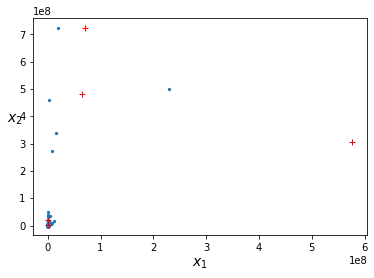

<Figure size 72x72 with 0 Axes>

In [147]:
    plt.scatter(basebcb['RuralAgro_Total'],basebcb['Total da Carteira de Pessoa Física'],s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.plot(Centers4[:,0],Centers3[:,1], 'r+')
    plt.figure(figsize=(1, 1))
    plt.show()

# Clusterização V15 vs Total por categoria:

In [221]:
X = basebcb[['EmpComFolha_v15','EmpSemFolha_v15','Veiculos_v15','Habitacao_v15','Cartao_v15','RuralAgro_v15','Outros_v15']]
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [222]:
X = X.reset_index()


In [223]:
np.isnan(X.any()) 

index              False
EmpComFolha_v15    False
EmpSemFolha_v15    False
Veiculos_v15       False
Habitacao_v15      False
Cartao_v15         False
RuralAgro_v15      False
Outros_v15         False
dtype: bool

In [224]:
np.isfinite(X.all())

index              True
EmpComFolha_v15    True
EmpSemFolha_v15    True
Veiculos_v15       True
Habitacao_v15      True
Cartao_v15         True
RuralAgro_v15      True
Outros_v15         True
dtype: bool

In [225]:
y_pred

array([3, 1, 4, ..., 0, 0, 0])

In [226]:
y_pred is kmeans.labels_

True

In [227]:
Centers7a = kmeans.cluster_centers_
Centers7a

array([[5.30967213e+02, 2.79505100e+03, 7.88184882e+02, 1.41812386e+01,
        3.56376594e+03, 3.51551002e+02, 1.37075865e+03],
       [3.64356500e+05, 1.16104250e+06, 2.42502500e+05, 6.20830000e+04,
        5.73745600e+06, 5.63732500e+05, 1.27313700e+06],
       [1.05762300e+06, 1.31594200e+06, 9.40508000e+05, 7.57070000e+04,
        2.78008300e+06, 2.82850000e+04, 2.68359100e+06],
       [6.45178333e+04, 1.41242667e+05, 1.02733333e+05, 1.01054083e+05,
        1.17374067e+06, 9.97816667e+03, 1.34236917e+05],
       [5.38820000e+05, 6.55264000e+05, 5.38836000e+05, 5.63780000e+04,
        1.03532640e+07, 1.72400000e+03, 2.62406800e+06]])

In [228]:
model = AgglomerativeClustering(affinity = "euclidean", linkage = "ward", n_clusters = 5)
clusters = model.fit_predict(X)

In [229]:
Clust = pd.DataFrame(clusters)
X['cluster'] = Clust
X['cluster'].value_counts()

3    1094
0      16
1       2
2       1
4       1
Name: cluster, dtype: int64

In [230]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [231]:
inertias

[233577007978999.47,
 61003042513571.4,
 36538905924991.016,
 19553447675084.6,
 11544014902389.258,
 8374489693958.302,
 5609636531628.306,
 3175998476171.3774,
 2368760610996.807]

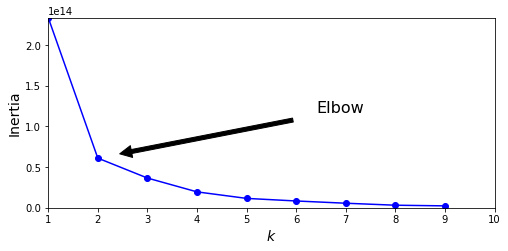

In [235]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 10, 0, 233577007978999.47])
plt.show()

In [236]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)

In [237]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [238]:
Clust = pd.DataFrame(clusters)
X['cluster'] = Clust
X['cluster'].value_counts()

3    1094
0      16
1       2
2       1
4       1
Name: cluster, dtype: int64

In [ ]:
# Clusterização a partir dos Percentuais vencidos sobre total do produto

In [398]:
X2 = basebcb[['EmpComFolha_perc','EmpSemFolha_perc','Veiculos_perc','Habitacao_perc','Cartao_perc','RuralAgro_perc','Outros_perc']]

In [382]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X2)

In [383]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [384]:
Centers7a = kmeans.cluster_centers_
Centers7a

array([[ 4.84057684e-03,  2.16644180e-02,  4.76157494e-03,
         1.62630326e-19,  1.77077144e-03,  1.69752843e-03,
         2.64261083e-01],
       [ 5.78384818e-03,  1.57120674e-02,  3.93025081e-03,
         2.41752931e-04,  1.51830157e-02,  2.78114650e-03,
         3.12798745e-02],
       [ 4.25819985e-02,  5.65393452e-02,  1.67201802e-03,
        -2.71050543e-20,  4.81490559e-02,  4.33680869e-19,
         8.85067888e-01],
       [ 4.01897933e-03,  6.60912829e-02,  2.67969921e-02,
         3.30741966e-04,  6.41219330e-01,  1.27267269e-04,
         2.53523276e-02],
       [ 5.98460058e-02,  3.59323759e-01,  2.55558455e-02,
         7.04996753e-04,  3.55310344e-02,  2.45495164e-04,
         6.66806532e-03]])

In [385]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X2)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [386]:
inertias

[46.54908408015271,
 26.562764776850244,
 20.69534227139838,
 15.206146703650004,
 11.566401555890973,
 9.670632154622016,
 8.62324732224296,
 7.627818125929372,
 6.712248949917035]

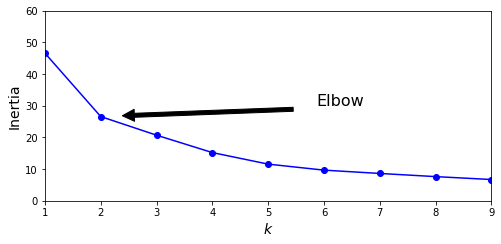

In [388]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 9, 0, 60])
plt.show()

In [389]:
Clust = pd.DataFrame(clusters)
X2['cluster'] = Clust
X2['cluster'].value_counts()

2.0    995
3.0     37
4.0      5
1.0      2
0.0      2
Name: cluster, dtype: int64

In [390]:
X2 = X2.reset_index()


In [393]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X2)

In [394]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [399]:
model = AgglomerativeClustering(affinity = "euclidean", linkage = "ward", n_clusters = 2)
clusters = model.fit_predict(X2)

In [400]:
Clust = pd.DataFrame(clusters)
X2['cluster'] = Clust
X2['cluster'].value_counts()

0.0    963
1.0     78
Name: cluster, dtype: int64

In [299]:
X = basebcb[['EmpComFolha_Total','EmpComFolha_v15']]

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [300]:
y_pred

array([1, 3, 2, ..., 0, 0, 0])

In [222]:
Centers7a = kmeans.cluster_centers_
Centers7a

array([[4.13148118e+05, 2.14636730e+05, 2.24137735e+05, 2.65715687e+05,
        3.86356483e+05, 3.39262251e+05, 1.37471506e+05],
       [9.02066390e+07, 1.39461560e+07, 9.24600000e+04, 5.76343778e+08,
        1.13771100e+07, 1.95648890e+07, 1.20387000e+07]])

In [151]:
y_pred is kmeans.labels_


True

In [152]:
Centers7 = kmeans.cluster_centers_
Centers7

array([[3.60177475e+04, 2.41976299e+02],
       [8.81423855e+07, 5.21641000e+05],
       [6.25033765e+07, 7.98221500e+05],
       [1.10683072e+08, 3.01449000e+05],
       [8.21286908e+06, 3.96458333e+04]])

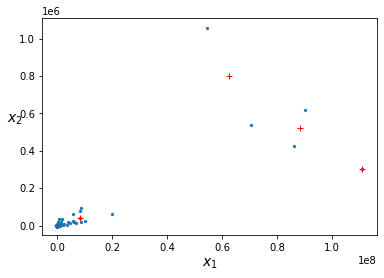

<Figure size 72x72 with 0 Axes>

In [153]:
    plt.scatter(basebcb['EmpComFolha_Total'],basebcb['EmpComFolha_v15'],s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.plot(Centers7[:,0],Centers7[:,1], 'r+')
    plt.figure(figsize=(1, 1))
    plt.show()

In [154]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [155]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
        
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [145]:
#kmeans_k3 = KMeans(n_clusters=1, random_state=42)
#kmeans_k5 = KMeans(n_clusters=2, random_state=42)
#plot_clusterer_comparison(kmeans_k3, kmeans_k5, [basebcb['EmpComFolha_Total'],basebcb['EmpComFolha_v15']], "$k=3$", "$k=5$")
#plt.show()


In [157]:
X = basebcb[['Total da Carteira de Pessoa Física','RuralAgro_Total']]

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

In [158]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [159]:
inertias

[1.2305296517504973e+18,
 1.7034839577799405e+17,
 7.666096731160021e+16,
 2.951331021087676e+16,
 1.3308401829328806e+16,
 5625750782037812.0,
 3479139147359579.5,
 1378954235390294.2,
 872424684954328.8]

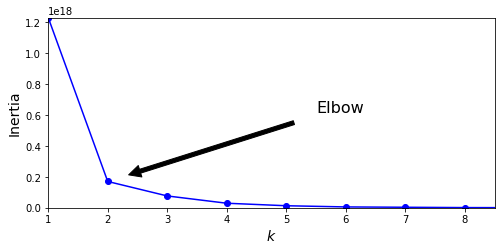

In [160]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1.2305296517504973e+18])
plt.show()

In [403]:
plot_decision_boundaries(kmeans_per_k[2-1], X)
plt.scatter(basebcb['EmpComFolha_Total'],basebcb['EmpComFolha_v15'],s=5)
plt.show()

NameError: name 'plot_decision_boundaries' is not defined

In [162]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)

In [163]:
Centers8 = kmeans.cluster_centers_
Centers8

array([[6.59438805e+05, 1.08024305e+05],
       [4.58837302e+08, 5.54729640e+07]])

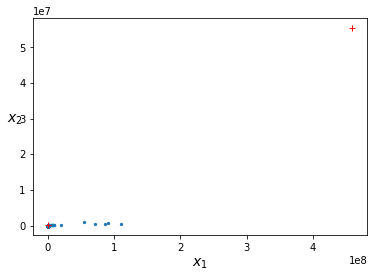

<Figure size 72x72 with 0 Axes>

In [164]:
    plt.scatter(basebcb['EmpComFolha_Total'],basebcb['EmpComFolha_v15'],s=5)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.plot(Centers8[:,0],Centers8[:,1], 'r+')
    plt.figure(figsize=(1, 1))
    plt.show()

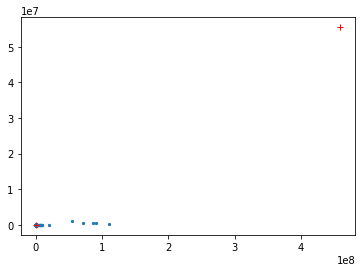

In [165]:
plt.scatter(basebcb['EmpComFolha_Total'],basebcb['EmpComFolha_v15'],s=5)
plt.plot(Centers8[:,0],Centers8[:,1], 'r+')
plt.show()

# Base Risco da Operação

In [254]:
baserisco = pd.read_excel(r'C:\Users\jgjoa\Documents\dados(2aBase).xlsx',decimal=',')

baserisco.head()

,Instituição financeira,Código,TCB,TD,TC,SR,Segmento,Cidade,UF,Data,...,AA,A,B,C,D,E,F,G,H,Total Exterior
0,ITAU,10069.0,b1,C,2.0,S1,199.0,SAO PAULO,SP,2022-06-01,...,271245582,221846904,47998021,18233893,8216128,5578006,6482991,7147330,15069213,326658682
1,CAIXA ECONÔMICA FEDERAL,51626.0,b1,C,1.0,S1,199.0,BRASILIA,DF,2022-06-01,...,449928655,162852098,135735087,100183474,29901793,9206608,5479025,14136051,14438645,0
2,BB,49906.0,b1,C,1.0,S1,199.0,BRASILIA,DF,2022-06-01,...,341406134,102861009,172594062,83805088,19496521,8498232,3956582,4095016,25725291,33253620
3,BRADESCO,10045.0,b1,C,2.0,S1,199.0,OSASCO,SP,2022-06-01,...,177809402,128109897,134221437,81142652,19610709,15347345,6505674,5149699,20238652,81912836
4,SANTANDER,30379.0,b1,C,3.0,S1,199.0,SAO PAULO,SP,2022-06-01,...,143456534,127141848,45023031,35423280,18493511,6886872,5329129,4882323,14633719,66547572


In [255]:
baserisco.drop(labels=range(1338, 1367), axis=0,inplace=True)


In [256]:
baserisco.tail()

,Instituição financeira,Código,TCB,TD,TC,SR,Segmento,Cidade,UF,Data,...,AA,A,B,C,D,E,F,G,H,Total Exterior
1333,FLAGSHIP INSTITUICAO DE PAGAMENTOS LTDA,23114447.0,n4,I,2.0,NaN,41.0,SAO PAULO,SP,2022-06-01,...,NI,NI,NI,NI,NI,NI,NI,NI,NI,NI
1334,HINOVA PAY INSTITUICAO DE PAGAMENTO S.A.,27970567.0,n4,I,2.0,NaN,41.0,BELO HORIZONTE,MG,2022-06-01,...,NI,NI,NI,NI,NI,NI,NI,NI,NI,NI
1335,BANQI INSTITUICAO DE PAGAMENTO LTDA.,30723871.0,n4,I,2.0,S5,41.0,SAO PAULO,SP,2022-06-01,...,NI,NI,NI,NI,NI,NI,NI,NI,NI,NI
1336,SHPP BRASIL INSTITUIÇÃO DE PAGAMENTO E SERVIÇO...,38372267.0,n4,I,2.0,NaN,41.0,SAO PAULO,SP,2022-06-01,...,NI,NI,NI,NI,NI,NI,NI,NI,NI,NI
1337,CRYSTAL BMC - INSTITUICAO DE PAGAMENTO LTDA.,43561343.0,n4,I,2.0,NaN,41.0,BARUERI,SP,2022-06-01,...,NI,NI,NI,NI,NI,NI,NI,NI,NI,NI


In [257]:
baserisco.columns

Index(['Instituição financeira', 'Código', 'TCB', 'TD', 'TC', 'SR', 'Segmento',
       'Cidade', 'UF', 'Data', 'Total Geral', 'AA', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'Total Exterior'],
      dtype='object')

In [258]:
baserisco = baserisco.rename(columns={
'Total Geral': 'Total_Geral',})

In [259]:
baserisco = baserisco[baserisco.Total_Geral!="NI"]
baserisco = baserisco[baserisco.Total_Geral!=0]
baserisco = baserisco.dropna()

In [260]:
baserisco.tail()

,Instituição financeira,Código,TCB,TD,TC,SR,Segmento,Cidade,UF,Data,...,AA,A,B,C,D,E,F,G,H,Total Exterior
1108,COOPERATIVA DE ECONOMIA E CREDITO MUTUO DOS EM...,27140946.0,b3S,I,2.0,S5,9.0,ITAPEMIRIM,ES,2022-06-01,...,0,27,3,0,0,1,0,0,0,0
1109,PÓLOCRED SOCIEDADE DE CRÉDITO AO MICROEMPREE...,7945233.0,n1,I,2.0,S5,10.0,FLORIANOPOLIS,SC,2022-06-01,...,0,0,23,0,0,0,0,0,0,0
1110,CREDBRASIL - SOCIEDADE DE CRÉDITO AO MICROEMPR...,3635061.0,n1,I,2.0,S5,10.0,PAULINIA,SP,2022-06-01,...,0,0,4,0,0,0,0,5,5,0
1111,COOPERATIVA DE CRÉDITO RURAL DOS AGROPECUARIST...,50334234.0,b3S,I,2.0,S5,9.0,PORTO FELIZ,SP,2022-06-01,...,0,0,0,0,0,0,0,0,2,0
1113,DMCARD SOCIEDADE DE CRÉDITO DIRETO S.A.,37555231.0,n1,I,2.0,S5,43.0,SAO JOSE DOS CAMPOS,SP,2022-06-01,...,0,2,0,0,0,0,0,0,0,0


In [261]:
BaseConsolidada = basebcb

In [262]:
BaseConsolidada = BaseConsolidada.merge(baserisco, left_on='Instituição financeira', right_on='Instituição financeira')

In [263]:
BaseConsolidada.columns

Index(['Instituição financeira', 'Código_x', 'TCB_x', 'TD_x', 'TC_x', 'SR_x',
       'Segmento_x', 'Cidade_x', 'UF_x', 'Data_x',
       'Total da Carteira de Pessoa Física', 'EmpComFolha_v15',
       'EmpComFolha_v90', 'EmpComFolha_v91a360', 'EmpComFolha_v361a1080',
       'EmpComFolha_v1081a1800', 'EmpComFolha_v1081a5400', 'EmpComFolha_v1081',
       'EmpComFolha_Total', 'EmpSemFolha_v15', 'EmpSemFolha_v90',
       'EmpSemFolha_v91a360', 'EmpSemFolha_v361a1080',
       'EmpSemFolha_v1081a1800', 'EmpSemFolha_v1081a5400', 'EmpSemFolha_v1081',
       'EmpSemFolha_Total', 'Veiculos_v15', 'Veiculos_v90', 'Veiculos_v91a360',
       'Veiculos_v361a1080', 'Veiculos_v1081a1800', 'Veiculos_v1081a5400',
       'Veiculos_v1081', 'Veiculos_Total', 'Habitacao_v15', 'Habitacao_v90',
       'Habitacao_v91a360', 'Habitacao_v361a1080', 'Habitacao_v1081a1800',
       'Habitacao_v1081a5400', 'Habitacao_v1081', 'Habitacao_Total',
       'Cartao_v15', 'Cartao_v90', 'Cartao_v91a360', 'Cartao_v361a1080',
   

In [316]:
BaseConsolidada= BaseConsolidada[BaseConsolidada['Total da Carteira de Pessoa Física']>0]



In [320]:
BaseConsolidada['perc_EmpComFolha_v15'] = BaseConsolidada['EmpComFolha_v15']/BaseConsolidada['Total da Carteira de Pessoa Física']
BaseConsolidada['perc_EmpSemFolha_v15'] = BaseConsolidada['EmpSemFolha_v15']/BaseConsolidada['Total da Carteira de Pessoa Física']
BaseConsolidada['perc_Veiculos_v15'] = BaseConsolidada['Veiculos_v15']/BaseConsolidada['Total da Carteira de Pessoa Física']
BaseConsolidada['perc_Habitacao_v15'] = BaseConsolidada['Habitacao_v15']/BaseConsolidada['Total da Carteira de Pessoa Física']
BaseConsolidada['perc_Cartao_v15'] = BaseConsolidada['Cartao_v15']/BaseConsolidada['Total da Carteira de Pessoa Física']
BaseConsolidada['perc_RuralAgro_v15'] = BaseConsolidada['RuralAgro_v15']/BaseConsolidada['Total da Carteira de Pessoa Física']
BaseConsolidada['perc_Outros_v15'] = BaseConsolidada['Outros_v15']/BaseConsolidada['Total da Carteira de Pessoa Física']






In [317]:
BaseConsolidada.describe

<bound method NDFrame.describe of                                  Instituição financeira    Código_x TCB_x  \
0                               CAIXA ECONÔMICA FEDERAL     51626.0    b1   
1                                                    BB     49906.0    b1   
2                                                  ITAU     10069.0    b1   
3                                              BRADESCO     10045.0    b1   
4                                             SANTANDER     30379.0    b1   
...                                                 ...         ...   ...   
1042  CREDBRASIL - SOCIEDADE DE CRÉDITO AO MICROEMPR...   3635061.0    n1   
1043         MONETARIE SOCIEDADE DE CRÉDITO DIRETO S.A.  46026562.0    n1   
1044  COOPERATIVA DE CRÉDITO RURAL DOS AGROPECUARIST...  50334234.0   b3S   
1045            DMCARD SOCIEDADE DE CRÉDITO DIRETO S.A.  37555231.0    n1   
1046  BOM CRÉDITO   SOCIEDADE DE CRÉDITO AO MICROEMP...   5669150.0    n1   

     TD_x  TC_x SR_x  Segmento_x         

In [321]:
X3 = BaseConsolidada[['A','B','C','D', 'E','F','G','H','perc_EmpComFolha_v15','perc_EmpSemFolha_v15','perc_Veiculos_v15','perc_Habitacao_v15','perc_Cartao_v15','perc_RuralAgro_v15','perc_Outros_v15']]

#X3 = BaseConsolidada[['AA','A','B','C','D', 'E','F','G','H']]

Vencidos = BaseConsolidada['EmpComFolha_v15'] +BaseConsolidada['EmpSemFolha_v15']+BaseConsolidada['Veiculos_v15']+BaseConsolidada['Habitacao_v15']+BaseConsolidada['Cartao_v15']+BaseConsolidada['RuralAgro_v15']+BaseConsolidada['Outros_v15'] 
y = BaseConsolidada['EmpComFolha_v15'] +BaseConsolidada['EmpSemFolha_v15']+BaseConsolidada['Veiculos_v15']+BaseConsolidada['Habitacao_v15']+BaseConsolidada['Cartao_v15']+BaseConsolidada['RuralAgro_v15']+BaseConsolidada['Outros_v15']

In [322]:
y=y.astype('float')

In [323]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.3)

In [325]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X3_train,y_train)

LinearRegression()

In [326]:
from sklearn.metrics import mean_squared_error

Vencpredictions = lin_reg.predict(X3_train)
lin_mse = mean_squared_error(y_train, Vencpredictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

64871.3438451485

In [327]:
score = lin_reg.score(X3_train, y_train)
print("Training score: ", round(score,2)) 


Training score:  0.98


In [328]:
lin_reg.coef_

array([-4.53136058e-03, -6.19861456e-02, -6.65781042e-02, -9.48354890e-02,
        1.78200661e-01,  1.59705602e+00,  4.49157981e-01,  5.74193642e-01,
       -1.13466611e+05, -3.07803718e+04,  1.48971974e+06, -7.23732745e+04,
        4.65442816e+05,  1.82705208e+05, -1.65198604e+04])

In [329]:
lin_reg.intercept_

6803.935365801975